# **[Perfect Sum Problem](https://practice.geeksforgeeks.org/problems/perfect-sum-problem5633/1)**

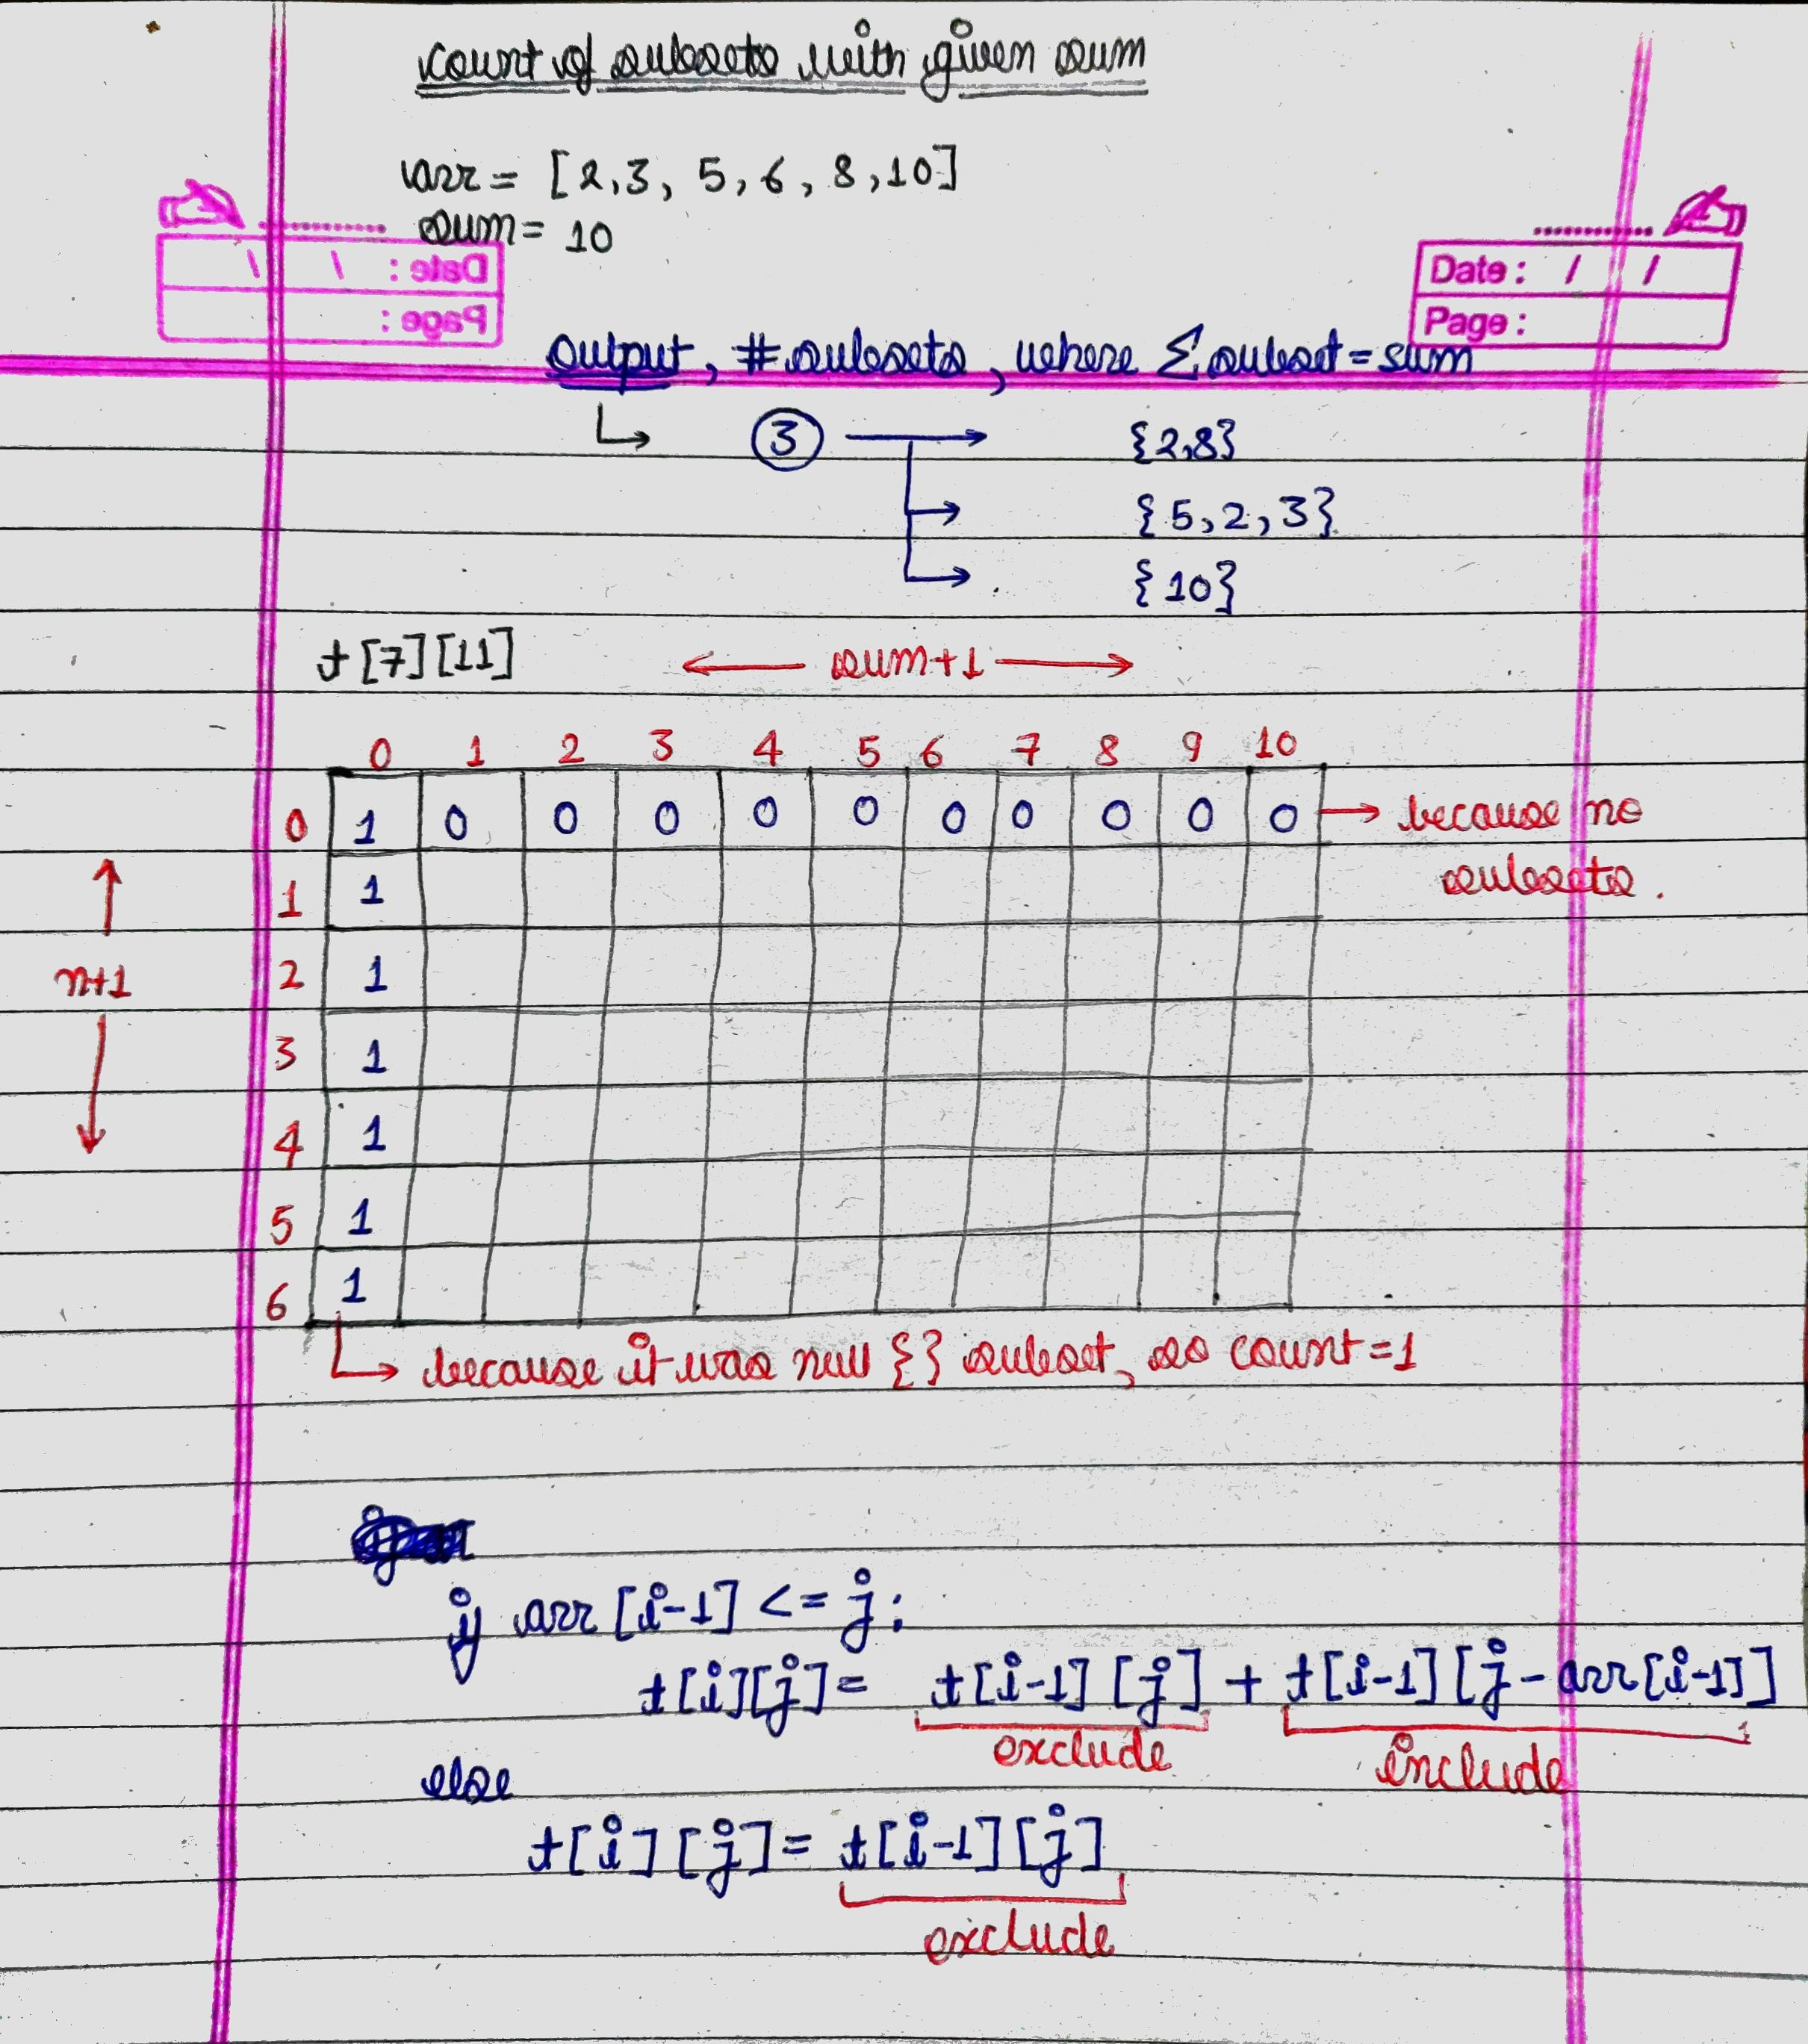

## **Recursion**

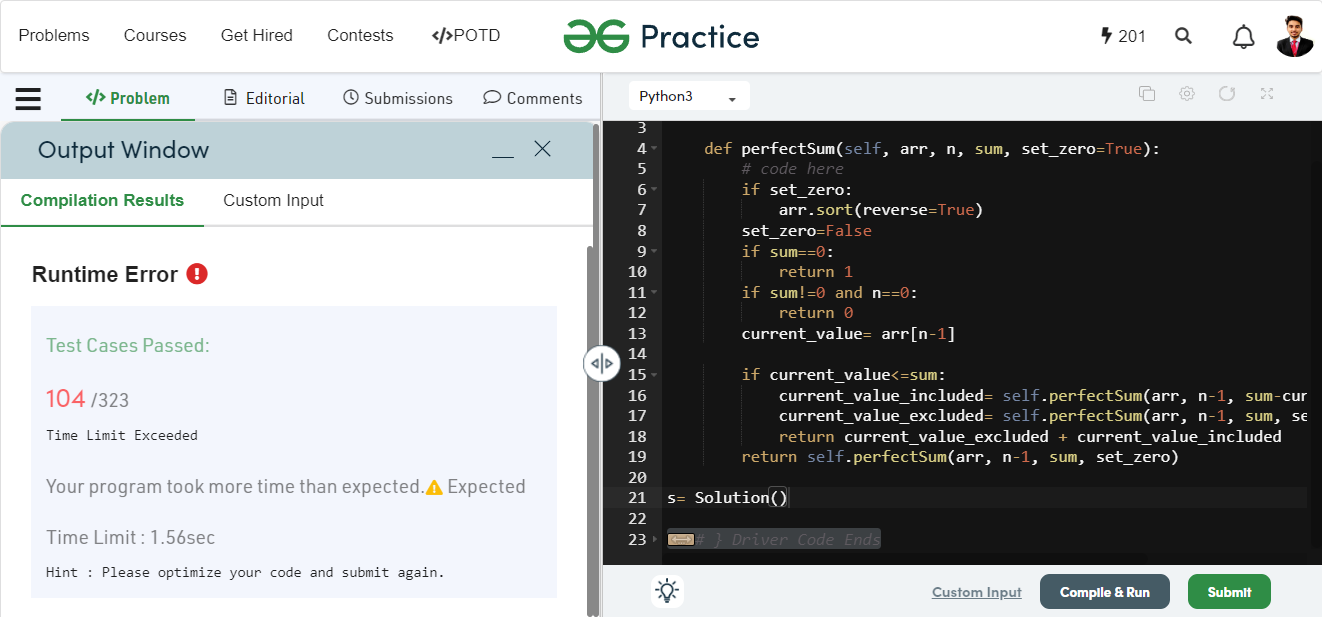

In [27]:
class Solution:
    
    def perfectSum(self, arr, n, sum, set_zero=True):
        # code here

        '''
            No need to do reverse anymore, now we can include the subsets with zero !!!
            just modify the base condition a bit 
        '''
        # if set_zero:
        #     arr.sort(reverse=True) # bring zeroes to the end 
        # set_zero=False

        # Base Condition
        if sum==0 and n==0:
            return 1
        if sum!=0 and n==0:
            return 0


        current_value= arr[n-1] 
        if current_value<=sum:
            current_value_included= self.perfectSum(arr, n-1, sum-current_value, set_zero) 
            current_value_excluded= self.perfectSum(arr, n-1, sum, set_zero) 
            return current_value_excluded + current_value_included
        return self.perfectSum(arr, n-1, sum, set_zero)

s= Solution()

In [28]:
n= 3
sum= 5
a= [0, 1, 4]
s.perfectSum(a,n, sum) # 2 subsets ---> [1,4] and [0, 1, 4]

2

In [29]:
N = 7
arr= [2, 3, 5, 6, 8, 10, 0]
sum = 10
s.perfectSum(arr, N, sum)

6

In [30]:
N = 6
arr= [2, 3, 5, 6, 8, 10]
sum = 10
s.perfectSum(arr, N, sum)

3

In [21]:
N = 5
arr= [1, 2, 3, 4, 5]
sum = 10
s.perfectSum(arr, N, sum)

3

In [22]:
N = 10
arr= [9, 7, 0, 3, 9, 8, 6, 5, 7, 6]
sum = 31 # we need 40
s.perfectSum(arr, N, sum)

40

## **Memoization**
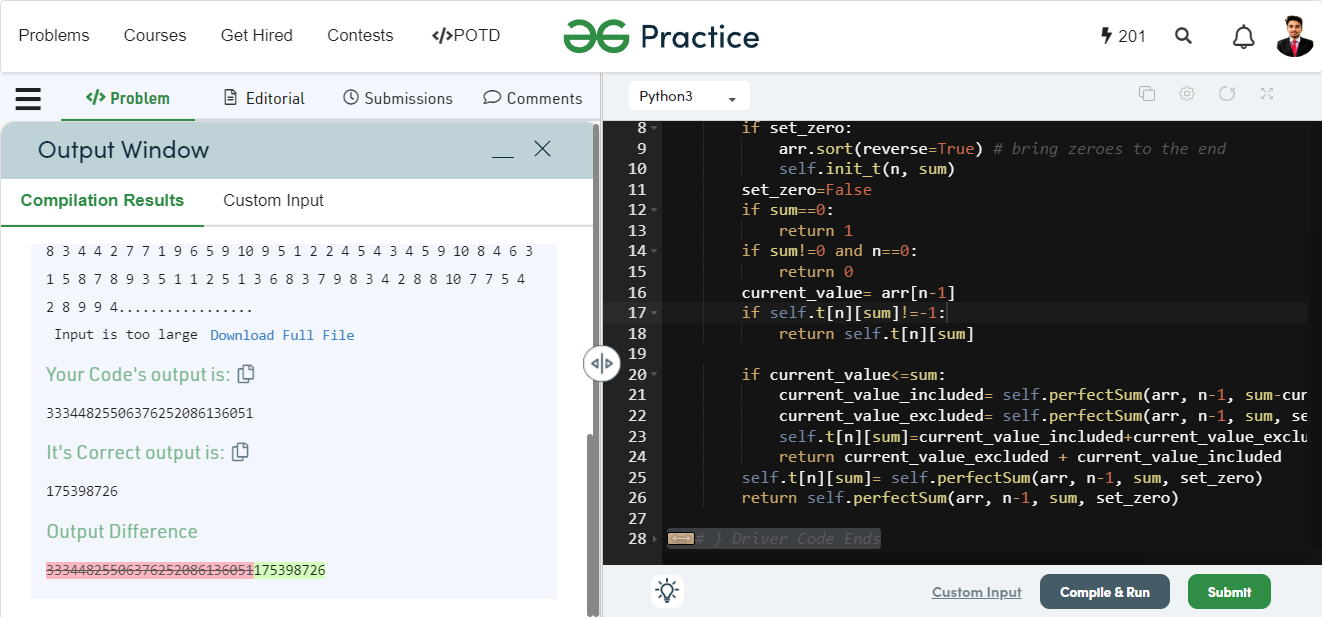

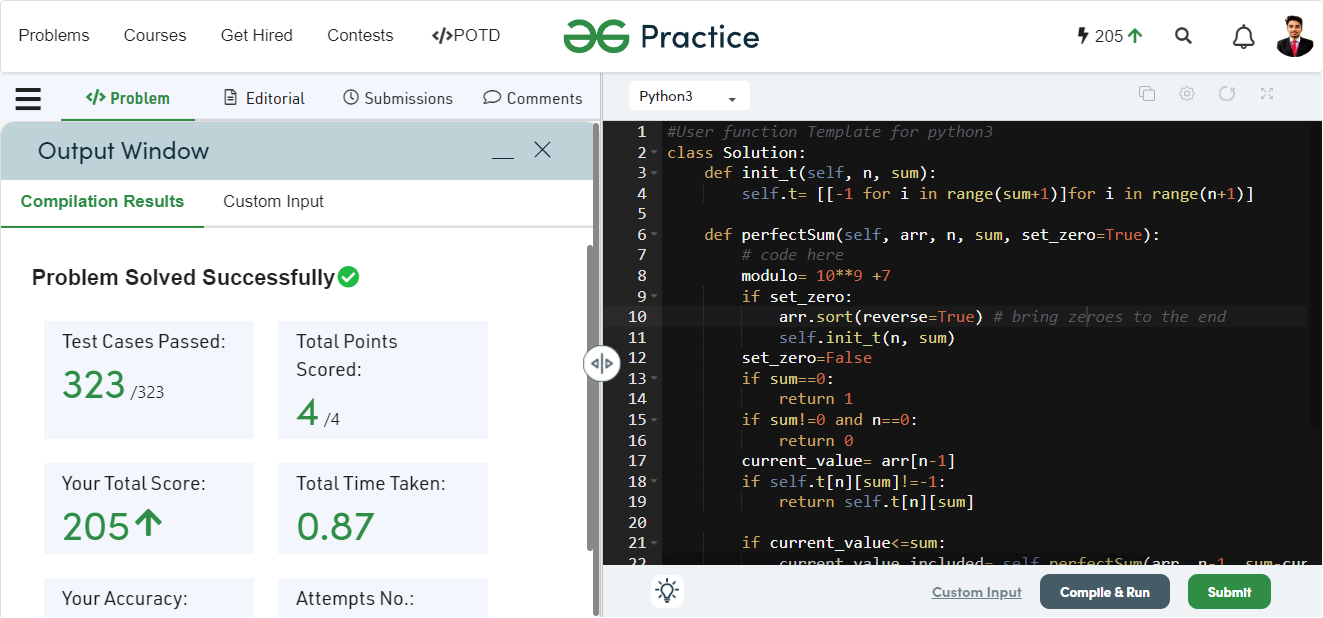

In [32]:
class Solution:
    def init_t(self, n, sum):
        self.t= [[-1 for i in range(sum+1)]for i in range(n+1)]
        self.t
    
    def perfectSum(self, arr, n, sum, set_zero=True):
        # code here
        modulo= 10**9 +7
        if set_zero:
            arr.sort(reverse=True) # bring zeroes to the end 
            self.init_t(n, sum)
        set_zero=False
        if sum==0:
            return 1
        if sum!=0 and n==0:
            return 0
        current_value= arr[n-1]
        if self.t[n][sum]!=-1:
            return self.t[n][sum]       
        if current_value<=sum:
            current_value_included= self.perfectSum(arr, n-1, sum-current_value, set_zero) 
            current_value_excluded= self.perfectSum(arr, n-1, sum, set_zero) 
            self.t[n][sum]=(current_value_included+current_value_excluded)%modulo
            return self.t[n][sum]
        self.t[n][sum]= (self.perfectSum(arr, n-1, sum, set_zero) )%modulo
        return self.t[n][sum]
s= Solution()

In [33]:
n= 3
sum= 5
a= [0, 1, 4]
s.perfectSum(a,n, sum)

2

In [34]:
N = 7
arr= [2, 3, 5, 6, 8, 10, 0]
sum = 10
s.perfectSum(arr, N, sum)

6

In [35]:
N = 6
arr= [2, 3, 5, 6, 8, 10]
sum = 10
s.perfectSum(arr, N, sum)

3

In [36]:
N = 5
arr= [1, 2, 3, 4, 5]
sum = 10
s.perfectSum(arr, N, sum)

3

In [37]:
N = 10
arr= [9, 7, 0, 3, 9, 8, 6, 5, 7, 6]
sum = 31
s.perfectSum(arr, N, sum)

40

## **Bottom Up**

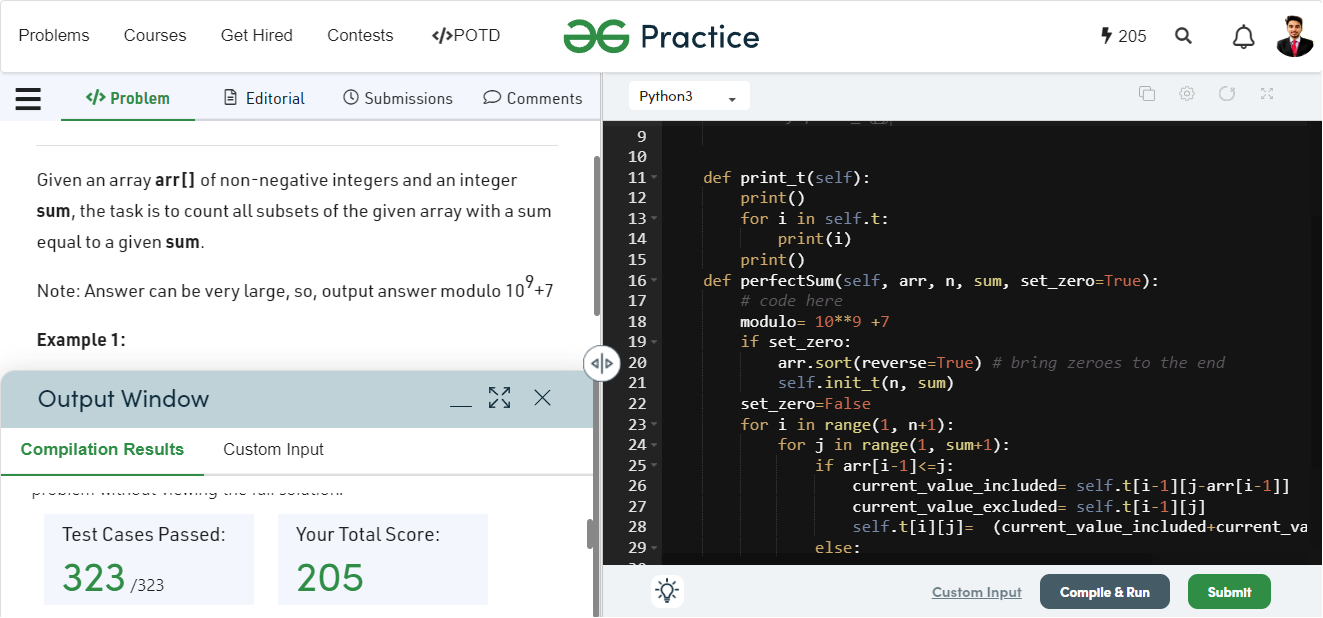

In [46]:
class Solution:
    def init_t(self, n, sum):
        self.t= [[-1 for i in range(sum+1)]for i in range(n+1)]
        self.t[0]= [0]*(sum+1)
        for i in self.t:
            i[0]=1
        self.print_t()
        

    def print_t(self):
        print()
        for i in self.t:
            print(i)
        print()
    def perfectSum(self, arr, n, sum, set_zero=True):
        # code here
        modulo= 10**9 +7
        if set_zero:
            arr.sort(reverse=True) # bring zeroes to the end 
            self.init_t(n, sum)
        set_zero=False
        for i in range(1, n+1):
            for j in range(1, sum+1):
                if arr[i-1]<=j:
                    current_value_included= self.t[i-1][j-arr[i-1]]
                    current_value_excluded= self.t[i-1][j]
                    self.t[i][j]=  (current_value_included+current_value_excluded )%modulo
                else:
                    self.t[i][j]= (self.t[i-1][j])%modulo
        return self.t[-1][-1]

s= Solution()

In [47]:
n= 3
sum= 5
a= [0, 1, 4]
print(s.perfectSum(a,n, sum))
s.print_t()



[1, 0, 0, 0, 0, 0]
[1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1]

2

[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 1]
[1, 2, 0, 0, 2, 2]



In [40]:
N = 7
arr= [2, 3, 5, 6, 8, 10, 0]
sum = 10
print(s.perfectSum(arr, N, sum))
s.print_t()


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

6

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1]
[1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 3]
[1, 0, 2, 2, 0, 4, 2, 2, 6, 2, 6]



In [41]:
N = 6
arr= [2, 3, 5, 6, 8, 10]
sum = 10
print(s.perfectSum(arr, N, sum))
s.print_t()


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

3

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1]
[1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 3]



In [42]:
N = 5
arr= [1, 2, 3, 4, 5]
sum = 10
print(s.perfectSum(arr, N, sum))
s.print_t()


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

3

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1]
[1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3]



In [43]:
N = 10
arr= [9, 7, 0, 3, 9, 8, 6, 5, 7, 6]
sum = 31
print(s.perfectSum(arr, N, sum))
s.print_t()


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1